# Worksheet 6 - sd21ms198
# Problem 1

# Part (a) 

In [70]:
import numpy as np
import math as m
from tabulate import tabulate
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [71]:
def f1(t,y,mu,lamda):
  return np.array([y[1],mu*(1-(y[0]**2))*y[1]-lamda*y[0]],dtype=object) # it will provide 2d array of value

In [72]:
def rk4w(f,x,y,h,mu,lamda): # Rk4 Method
    k1= h*f(x,y,mu,lamda)
    k2=h* f(x+(h/2),y+ (k1/2),mu,lamda)
    k3 = h*f(x+(h/2),y+(k2/2),mu,lamda)
    k4= h*f(x+h,y+k3,mu,lamda)
    return y + ((k1+2*k2+2*k3+k4)/6);

In [73]:
def eval6(method, fn, y_ini, xs, h,mu,lamda):
    ys = np.zeros(shape=(len(xs),len(y_ini)))
    y = y_ini
    for i in range(len(xs)):
        x = xs[i]
        ys[i] = y
        y = method(fn, x, y, h,mu,lamda)

    return ys

In [82]:

# Parameters 
mu = 5
lamda = 40


# Initial Conditions
y_initial = np.array([0.0,0.5])
h =0.01
t_start = 0.0
t_stop= 20.0
ts = np.arange(t_start,t_stop+h,h)


pp1 = eval6(rk4w,f1,y_initial,ts,h,mu,lamda)
y_rk4 = pp1[:,0]
y_prime_rk4= pp1[:,1]





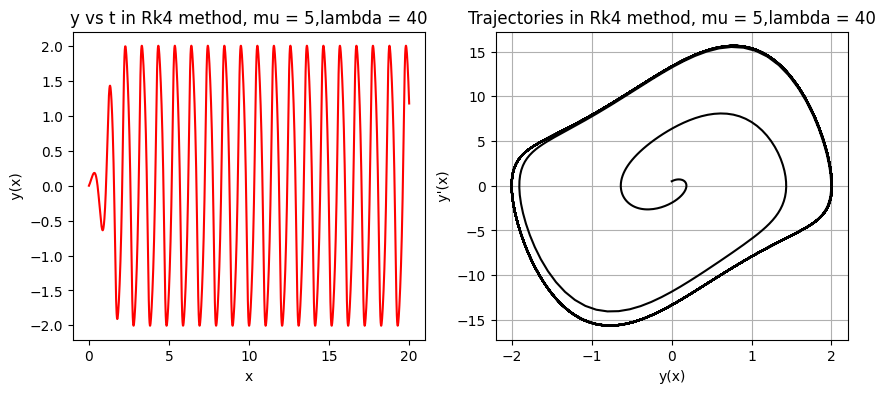

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(ts,y_rk4,color='red')
axs[0].set_title(f"y vs t in Rk4 method, mu = {mu},lambda = {lamda}")
axs[0].set_xlabel('x')
axs[0].set_ylabel(" y(x) ")

# Plot the second subplot
axs[1].plot(y_rk4,y_prime_rk4,color='black')
axs[1].set_title(f"Trajectories in Rk4 method, mu = {mu},lambda = {lamda}")
axs[1].set_xlabel('y(x)')
axs[1].set_ylabel(" y'(x) ")

plt.grid()

# Part (b)

In [76]:
# Dormand-Prince
a2 = 1/5; b21 = 1/5
a3 = 3/10; b31 = 3/40; b32 = 9/40
a4 = 4/5; b41 = 44/45; b42 = -56/15; b43 = 32/9
a5 = 8/9; b51 = 19372/6561; b52 = -25360/2187; b53 = 64448/6561; b54 =-212/729
a6 = 1; b61 = 9017/3168; b62 = -355/33; b63 = 46732/5247; b64 = 49/176; b65 = -5103/18656
a7 = 1; b71 = 35/384; b72 = 0; b73 = 500/1113; b74 = 125/192
b75 = -2187/6784; b76 = 11/84
c1 = 35/384; c2 = 0; c3 = 500/1113; c4 = 125/192; c5=-2187/6784; c6 = 11/84; c7= 0
c1s = 5179/57600; c2s = 0; c3s = 7571/16695; c4s = 393/640; c5s = -92097/339200
c6s = 187/2100; c7s = 1/40

In [77]:

# Embedded Runge-Kutta formulas

def erk54h(f, x, y, h, k7bh,mu,lamda):

    # k1 = k7bh, unless k1 is zero (initially)
    if sum(k7bh)==0:  
        k1 = h*f(x, y,mu,lamda) 
    else:
        k1 = k7bh*h
        
    # Implement rest of the Butcher table
    k2 = h*f(x + a2*h, y + b21*k1,mu,lamda)
    k3 = h*f(x + a3*h, y + b31*k1 + b32*k2,mu,lamda)
    k4 = h*f(x + a4*h, y + b41*k1 + b42*k2 + b43*k3,mu,lamda)
    k5 = h*f(x + a5*h, y + b51*k1 + b52*k2 + b53*k3 + b54*k4,mu,lamda)
    k6 = h*f(x + a6*h, y + b61*k1 + b62*k2 + b63*k3 + b64*k4 + b65*k5,mu,lamda)
    
    
    # get y fifth-order correct
    y5 = y + c1*k1 + c2*k2 + c3*k3 + c4*k4 + c5*k5 + c6*k6 # c7 = 0
    
    # FSAL -> the last
    k7bh = f(x + a7*h, y5,mu,lamda)
    
    # get y fourth-order correct
    y4 = y + c1s*k1 + c2s*k2 + c3s*k3 + c4s*k4 + c5s*k5 + c6s*k6 + c7s*k7bh*h

    err =  abs(y5 - y4)
    return y5, err, k7bh




In [105]:
def caller54(fn, y_ini, x0, xT, h0, max_iter, abstol, reltol,mu,lamda):
    y = y_ini
    h = h0
    ys = np.zeros((max_iter,len(y_ini)))
    xs = np.zeros((max_iter,1))
    xs[0] = x0
    ys[0,:] = y_ini
    x = x0
    i = 0
    k7bh = np.zeros_like(y_ini)
    h_values = np.zeros((max_iter,1))
    i_values = np.zeros((max_iter,1))
    
    while x<=xT and i+1<max_iter:
    # calculate the tolerance
        if i == 0:
            tol = abstol + reltol*np.linalg.norm(ys[i,:])
        else:
            tol = abstol + reltol*np.max([np.linalg.norm(ys[i,:]), np.linalg.norm(ys[i-1,:])])
        
        # get the next y and the error
        
        y, err, k7bh = erk54h(fn,xs[i],ys[i,:],h, k7bh,mu,lamda);
        
        # get max error and the scale factor
        merr = np.max(err)


        #scale_factor = (tol/merr)^0.2;
        
        if merr == 0.0:
            merr = tol/100 

        # If the step is valid (less error than tol) then:
        
        if merr<tol:
            x += h
            i += 1
            xs[i] = x
            ys[i,:] = y

        # Updating h adaptively by multlipyling scaling factor
       
        h = 0.9*h*((tol/merr)**0.2)
        h_values[i]= h
        i_values[i]= i
       
    # if the maximum number of steps exceeded
        if i+1>=max_iter:
            print("Increase max_iter.")
            break
    
    # Number of steps, x array, and y vector array
    return i+1,xs[0:i+1], ys[0:i+1,:],h_values,i_values


In [106]:
# Parameters
mu =5
lamda = 40

# Initial Conditions
max_iter = 20000
abstol = 1.0e-6
reltol = 1.0e-8
y_ini = np.array([0.5,0.0])
x0 = 0.0
xT = 20.0
h0 = 0.1


# Evaluating step sizes, x, y and y' by given initial conditions and parameter values
step_size,x,y_values,hv,iv = caller54(f1, y_ini, x0,xT, h0, max_iter, abstol, reltol,mu,lamda)

y = y_values[:,0] # y
y_prime = y_values[:,1] # y'


No. of Steps required: 3166


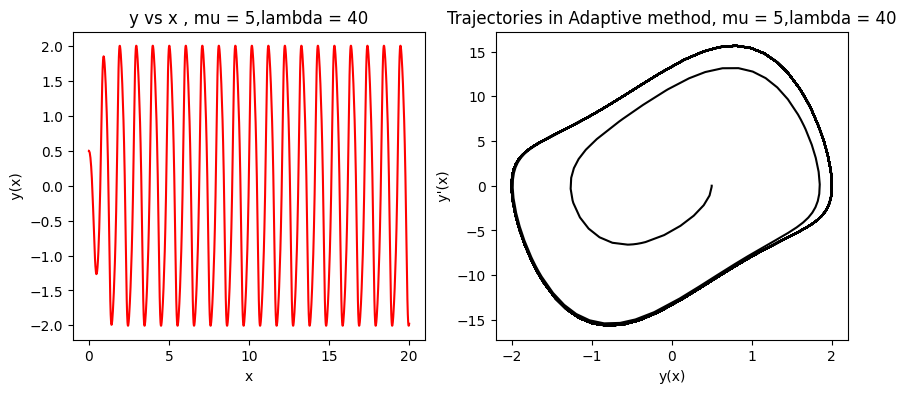

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(x,y,color='red')
axs[0].set_title(f"y vs x , mu = {mu},lambda = {lamda}")
axs[0].set_xlabel('x')
axs[0].set_ylabel(" y(x) ")

# Plot the second subplot
axs[1].plot(y,y_prime,color='black')
axs[1].set_title(f"Trajectories in Adaptive method, mu = {mu},lambda = {lamda}")
axs[1].set_xlabel('y(x)')
axs[1].set_ylabel(" y'(x) ")

print(f'No. of Steps required: {step_size}')


Maximum value of h: 0.045261512034641536


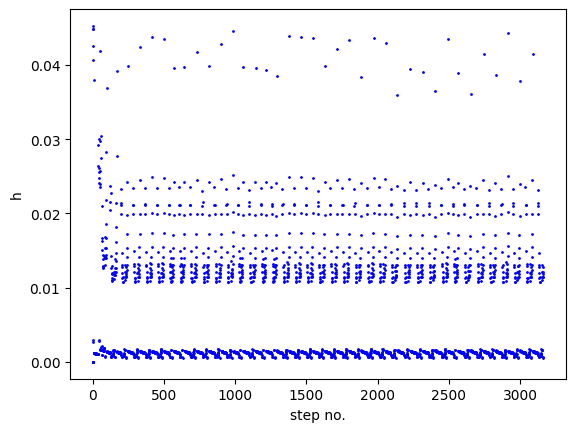

In [95]:
# Change in value of h with time 

plt.scatter(iv,hv,color = 'blue',s=1)
plt.xlabel('step no.')
plt.ylabel('h')

print(f'Maximum value of h: {np.max(hv)}')
